In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


# set seed for reproducibility
np.random.seed(0)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/hotel-booking/hotel_booking.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
5627,Resort Hotel,0,354,2016,May,19,6,2,5,2,...,Transient,37.56,0,0,Check-Out,2016-05-13,Bob Park,Bob.Park@hotmail.com,792-606-2902,************1699
119322,City Hotel,0,142,2017,August,35,31,0,3,2,...,Transient,86.10,0,0,Check-Out,2017-09-03,Holly Werner,Holly.Werner@outlook.com,442-500-6336,************5008
75310,City Hotel,1,304,2015,August,34,17,1,1,2,...,Transient-Party,62.00,0,0,Canceled,2015-07-02,Grace Fuller,Fuller.Grace@mail.com,103-386-7905,************2739
90032,City Hotel,0,5,2016,May,22,28,2,2,2,...,Transient,133.10,0,1,Check-Out,2016-06-01,Laura Baker,Laura.B@verizon.com,860-560-9489,************8330
75368,City Hotel,1,313,2015,August,35,26,0,2,2,...,Transient-Party,62.00,0,0,Canceled,2015-07-02,Brandon Morgan,BrandonMorgan@outlook.com,417-205-2074,************4679


In [4]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# data cleaning
# handeling missing value
missing_values_count = df.isnull().sum()
missing_values_count[0:]

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
(total_missing/total_cells) * 100

3.01125629356637

In [8]:
# remove all the rows that contain a missing value
df=df.dropna()

In [9]:
#Filling in missing values automatically
# replace all NA's with 0
df.fillna(0)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,Transient-Party,150.0,0,1,Check-Out,2017-05-25,Meghan Flores,Flores_Meghan@verizon.com,439-451-4147,************8201
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,Transient,95.0,0,0,Check-Out,2017-06-02,Jordan Olson,Jordan.O@mail.com,860-873-3107,************9138
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,Transient,110.0,0,0,Check-Out,2017-06-02,Robert Reynolds,Robert.R@yandex.com,604-257-1344,************8808
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,Transient,135.0,0,0,Check-Out,2017-06-10,Mrs. Colleen Mcdaniel MD,Mrs._MD@outlook.com,929-209-4199,************4558


In [10]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
df.fillna(method = 'bfill', axis=0).fillna(0)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,Transient-Party,150.0,0,1,Check-Out,2017-05-25,Meghan Flores,Flores_Meghan@verizon.com,439-451-4147,************8201
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,Transient,95.0,0,0,Check-Out,2017-06-02,Jordan Olson,Jordan.O@mail.com,860-873-3107,************9138
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,Transient,110.0,0,0,Check-Out,2017-06-02,Robert Reynolds,Robert.R@yandex.com,604-257-1344,************8808
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,Transient,135.0,0,0,Check-Out,2017-06-10,Mrs. Colleen Mcdaniel MD,Mrs._MD@outlook.com,929-209-4199,************4558


Text(0.5, 1.0, 'Scaled data')

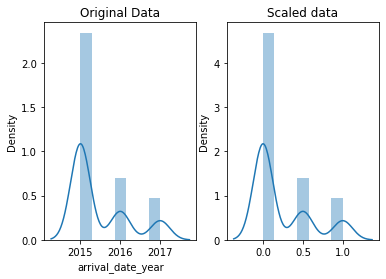

In [11]:
# scaling, Scaling just changes the range of  data. Normalization is a more radical transformation. The point of normalization is to 
#change your observations so that they can be described as a normal distribution.
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(df['arrival_date_year'], columns = [0])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['arrival_date_year'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5, 1.0, 'Normalized data')

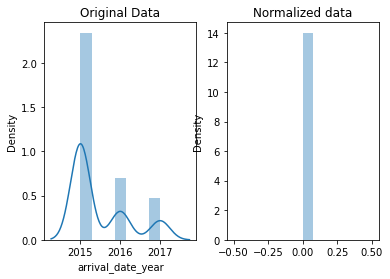

In [12]:
# normalize the  data with boxcox
normalized_arrival_date_year = stats.boxcox(df['arrival_date_year'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['arrival_date_year'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_arrival_date_year[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [13]:
#outlier
def detect_outliers(df,features):
    df_copy = df.drop(df[(df[features] == 0)].index)
    # 1st quartile
    q1 = df_copy[features].quantile(0.25)
    # 3rd quartile
    q3 = df_copy[features].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    outlier_list_col = df_copy[(df_copy[features] >= Upper_tail) | (df_copy[features] <= Lower_tail)]  # | means "or"
    return pd.DataFrame(outlier_list_col)

In [14]:
detect_outliers(df,'arrival_date_week_number')
# we have 18 outlier for the arrival_date_week_number varible

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
14383,Resort Hotel,0,18,2017,January,5,30,1,1,1,...,Transient-Party,53.00,0,1,Check-Out,2017-02-01,Charles Martinez,Charles_Martinez@zoho.com,216-166-0251,************5330
16645,Resort Hotel,0,17,2017,January,5,29,2,1,1,...,Transient-Party,49.67,0,1,Check-Out,2017-02-01,Danielle Allen,Danielle_Allen45@att.com,716-231-0112,************1566
18628,Resort Hotel,0,1,2017,March,9,1,0,1,1,...,Transient,34.20,0,1,Check-Out,2017-03-02,Jacqueline Burns,Jacqueline.B24@mail.com,151-498-3342,************9912
19901,Resort Hotel,0,8,2016,January,2,5,0,3,1,...,Transient,38.00,0,0,Check-Out,2016-01-08,Donna Park,Park_Donna@yahoo.com,178-561-8683,************4853
21078,Resort Hotel,0,3,2016,February,8,15,1,2,1,...,Transient,30.00,0,0,Check-Out,2016-02-18,Kimberly Hill,Hill.Kimberly@yandex.com,624-705-6626,************3679
21079,Resort Hotel,0,10,2016,March,12,14,1,2,1,...,Transient,37.00,0,0,Check-Out,2016-03-17,Maria Reyes,Maria.Reyes@gmail.com,723-537-3749,************7838
31758,Resort Hotel,0,5,2017,January,1,2,1,3,1,...,Transient-Party,40.40,1,1,Check-Out,2017-01-06,George Silva,Silva.George@outlook.com,580-875-3527,************3066
31759,Resort Hotel,0,5,2017,January,1,2,1,3,1,...,Transient-Party,40.40,1,1,Check-Out,2017-01-06,Ashley Anderson,Anderson.Ashley25@comcast.net,220-666-4513,************5482
32385,Resort Hotel,0,6,2017,January,4,24,0,1,1,...,Transient,43.00,0,0,Check-Out,2017-01-25,Michael Clark,MClark@mail.com,422-932-6914,************2521
32641,Resort Hotel,0,18,2017,January,5,30,1,1,1,...,Transient-Party,53.00,0,1,Check-Out,2017-02-01,Natalie Cox,Cox_Natalie93@yahoo.com,249-290-5408,************3395


In [15]:
# exploratory data analysis
#correlation and covariance
df.cov()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,0.072538,-0.661354,-0.013484,-0.010966,0.004523,-0.053870,-0.100614,-0.004502,0.001728,0.0,-0.000811,-0.000725,-0.002347,0.005291,-1.034712,-1.221305,0.0,-0.596729,-0.007254,-0.015596
lead_time,-0.661354,3812.861836,10.321322,84.475038,32.124019,8.976617,-0.334912,11.095622,-0.880398,0.0,-2.138014,-0.208525,-4.530850,-4.089286,-2545.531383,1596.722329,0.0,575.564205,-1.594513,-0.066628
arrival_date_year,-0.013484,10.321322,0.518476,-7.134323,2.007808,-0.315967,-1.119282,0.039704,0.024428,0.0,0.051011,0.014209,0.106972,-0.434524,-14.057262,-2.827338,0.0,13.844829,-0.015318,0.157343
arrival_date_week_number,-0.010966,84.475038,-7.134323,166.159626,-14.386435,5.975124,19.425243,-0.151092,-0.340672,0.0,-1.143391,-0.307390,-1.932134,6.572751,98.728921,356.557604,0.0,-158.367317,0.004800,-1.645929
arrival_date_day_of_month,0.004523,32.124019,2.007808,-14.386435,57.487711,-1.678059,-8.689857,0.280487,0.279634,0.0,0.317716,0.177547,0.650943,-2.551587,-213.150623,-33.087835,0.0,81.045518,-0.085637,1.400602
stays_in_weekend_nights,-0.053870,8.976617,-0.315967,5.975124,-1.678059,2.228153,4.464563,-0.085403,-0.048771,0.0,-0.020844,-0.005248,-0.005270,0.638228,-6.374787,17.536866,0.0,-11.162218,0.040109,-0.010987
stays_in_week_nights,-0.100614,-0.334912,-1.119282,19.425243,-8.689857,4.464563,12.622717,-0.283282,-0.088198,0.0,-0.150324,-0.033623,-0.116679,2.216931,66.997226,41.738330,0.0,-48.566580,0.089691,-0.269201
adults,-0.004502,11.095622,0.039704,-0.151092,0.280487,-0.085403,-0.283282,0.270823,0.021847,0.0,-0.009963,-0.003798,-0.019095,-0.066799,-16.981289,-5.270524,0.0,8.348231,-0.014828,0.020204
children,0.001728,-0.880398,0.024428,-0.340672,0.279634,-0.048771,-0.088198,0.021847,0.054190,0.0,0.006699,-0.000341,0.036205,-0.024471,-1.865463,1.551630,0.0,3.588658,-0.003414,0.011179
babies,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [16]:
#corelation
df_corelation= df.corr()
df_corelation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,-0.039767,-0.069527,-0.003159,0.002215,-0.133996,-0.105148,-0.032118,0.027563,NaN,-0.011839,-0.019837,-0.012140,0.015698,-0.034460,-0.043769,NaN,-0.057069,-0.092895,-0.105983
lead_time,-0.039767,1.000000,0.232138,0.106130,0.068615,0.097390,-0.001527,0.345290,-0.061248,NaN,-0.136182,-0.024873,-0.102228,-0.052918,-0.369766,0.249593,NaN,0.240089,-0.089066,-0.001975
arrival_date_year,-0.069527,0.232138,1.000000,-0.768645,0.367765,-0.293971,-0.437521,0.105956,0.145736,NaN,0.278636,0.145344,0.206977,-0.482208,-0.175110,-0.037900,NaN,0.495254,-0.073376,0.399946
arrival_date_week_number,-0.003159,0.106130,-0.768645,1.000000,-0.147198,0.310536,0.424158,-0.022524,-0.113531,NaN,-0.348873,-0.175642,-0.208829,0.407445,0.068700,0.266991,NaN,-0.316452,0.001284,-0.233704
arrival_date_day_of_month,0.002215,0.068615,0.367765,-0.147198,1.000000,-0.148268,-0.322588,0.071086,0.158432,NaN,0.164811,0.172475,0.119611,-0.268911,-0.252158,-0.042122,NaN,0.275325,-0.038957,0.338099
stays_in_weekend_nights,-0.133996,0.097390,-0.293971,0.310536,-0.148268,1.000000,0.841841,-0.109940,-0.140356,NaN,-0.054922,-0.025897,-0.004918,0.341655,-0.038306,0.113399,NaN,-0.192612,0.092679,-0.013472
stays_in_week_nights,-0.105148,-0.001527,-0.437521,0.424158,-0.322588,0.841841,1.000000,-0.153215,-0.106640,NaN,-0.166413,-0.069705,-0.045755,0.498610,0.169143,0.113393,NaN,-0.352100,0.087073,-0.138681
adults,-0.032118,0.345290,0.105956,-0.022524,0.071086,-0.109940,-0.153215,1.000000,0.180337,NaN,-0.075300,-0.053748,-0.051119,-0.102568,-0.292686,-0.097755,NaN,0.413196,-0.098274,0.071058
children,0.027563,-0.061248,0.145736,-0.113531,0.158432,-0.140356,-0.106640,0.180337,1.000000,NaN,0.113186,-0.010801,0.216683,-0.083999,-0.071879,0.064336,NaN,0.397079,-0.050577,0.087897
babies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


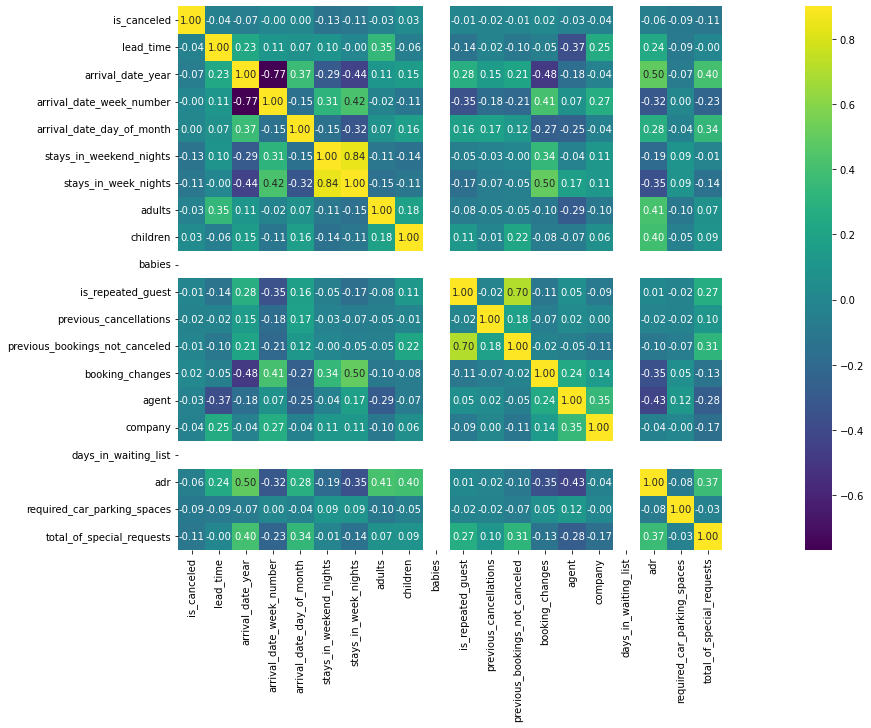

In [17]:

ax = plt.subplots(figsize = (30, 10))

sns.heatmap(df_corelation, vmax = 0.9, square = True, annot = True, fmt = '0.2f', cmap = 'viridis');

<AxesSubplot:xlabel='hotel', ylabel='lead_time'>

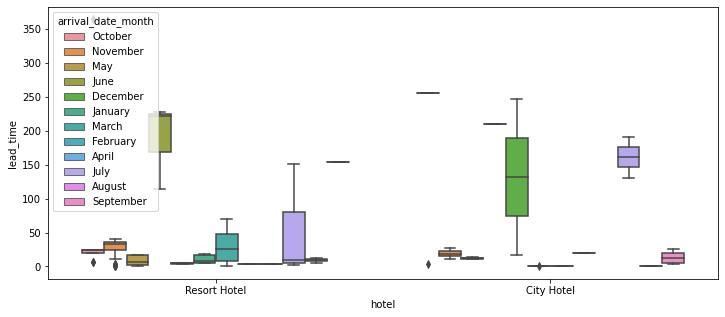

In [18]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x='hotel', y='lead_time', hue='arrival_date_month', data=df, ax=ax)

In [19]:
#number of hotels
df['hotel'].nunique() , df['hotel'].value_counts()

(2,
 Resort Hotel    170
 City Hotel       47
 Name: hotel, dtype: int64)

In [20]:
df['reserved_room_type'].value_counts(), df['assigned_room_type'].value_counts()

(A    168
 E     31
 D     15
 H      2
 C      1
 Name: reserved_room_type, dtype: int64,
 A    123
 D     39
 E     28
 C     10
 F      6
 G      4
 B      4
 H      2
 I      1
 Name: assigned_room_type, dtype: int64)

In [21]:
df['is_canceled'].groupby(df['deposit_type']).count()

deposit_type
No Deposit    213
Non Refund      1
Refundable      3
Name: is_canceled, dtype: int64

In [22]:
df['hotel'].value_counts()

Resort Hotel    170
City Hotel       47
Name: hotel, dtype: int64

In [23]:
# avg amount of cancelation in each hotel
df['is_canceled'].groupby(df['hotel']).mean()

hotel
City Hotel      0.042553
Resort Hotel    0.088235
Name: is_canceled, dtype: float64

In [24]:
# avrage of variables in each hotel 
h = df.groupby(['hotel'])
h.mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,
City Hotel,0.042553,70.914894,2016.042553,30.765957,16.170213,0.872340,2.021277,1.702128,0.063830,0.0,0.106383,0.000000,0.276596,0.425532,76.489362,200.574468,0.0,106.207447,0.000000,0.574468
Resort Hotel,0.088235,32.117647,2015.305882,40.252941,9.347059,1.758824,5.352941,1.329412,0.029412,0.0,0.058824,0.011765,0.111765,1.523529,237.488235,279.117647,0.0,52.067588,0.117647,0.094118


In [25]:
df['lead_time'].groupby (df['arrival_date_month']).mean()

arrival_date_month
April          4.000000
August         2.285714
December      55.200000
February      11.500000
January        7.272727
July          96.800000
June         193.500000
March         24.200000
May           10.333333
November      29.465116
October      155.833333
September     41.400000
Name: lead_time, dtype: float64

In [26]:
df['adults'].groupby(df['country']).mean()

country
AUS    2.000000
AUT    1.166667
BEL    1.000000
BGR    1.000000
CHE    1.000000
CHN    1.500000
CZE    1.500000
DEU    1.588235
ESP    1.375000
FRA    1.280000
GBR    1.631579
IRL    1.000000
ITA    1.437500
MEX    2.000000
NLD    2.000000
PRT    1.414634
ROU    3.000000
USA    1.500000
Name: adults, dtype: float64

In [27]:
df['is_repeated_guest'].groupby(df['hotel']).mean()

hotel
City Hotel      0.106383
Resort Hotel    0.058824
Name: is_repeated_guest, dtype: float64

In [28]:
df['lead_time'].groupby (df['arrival_date_month']).mean()

arrival_date_month
April          4.000000
August         2.285714
December      55.200000
February      11.500000
January        7.272727
July          96.800000
June         193.500000
March         24.200000
May           10.333333
November      29.465116
October      155.833333
September     41.400000
Name: lead_time, dtype: float64

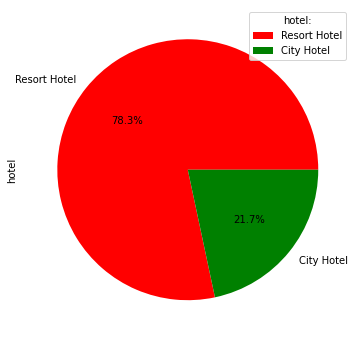

In [29]:
plt.figure(1, figsize=(6,6))
df['hotel'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "r", "g"),labels = df['hotel'].unique(), shadow = False)
plt.legend(title = "hotel:")
plt.show()

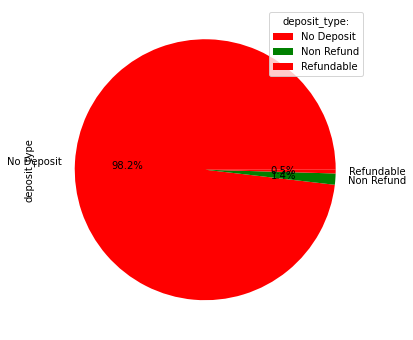

In [30]:
plt.figure(1, figsize=(6,6))
df['deposit_type'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "r", "g"),labels = df['deposit_type'].unique(), shadow = False)
plt.legend(title = "deposit_type:")
plt.show()

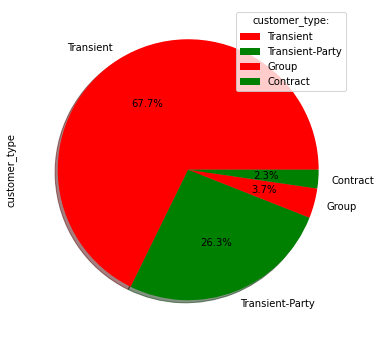

In [31]:
plt.figure(1, figsize=(6,6))
df['customer_type'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "r", "g"),labels = df['customer_type'].unique(), shadow = True)
plt.legend(title = "customer_type:")
plt.show()

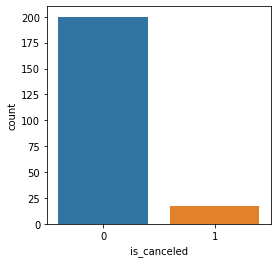

In [32]:
plt.figure(figsize = (4,4))

sns.countplot(x='is_canceled', data = df);

In [33]:
df['customer_type'].value_counts()

Transient-Party    147
Transient           57
Group                8
Contract             5
Name: customer_type, dtype: int64

<Figure size 576x576 with 0 Axes>

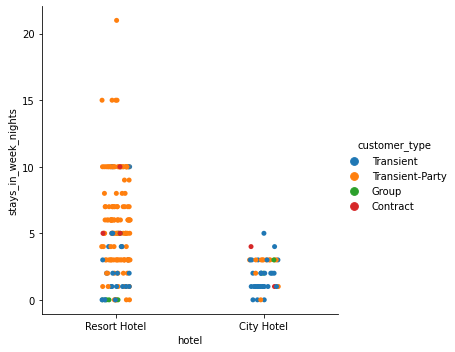

In [34]:
plt.figure(figsize = (8, 8))

sns.catplot(x = 'hotel', y = 'stays_in_week_nights', estimator = sum, 
            hue = 'customer_type' , 
            data = df);

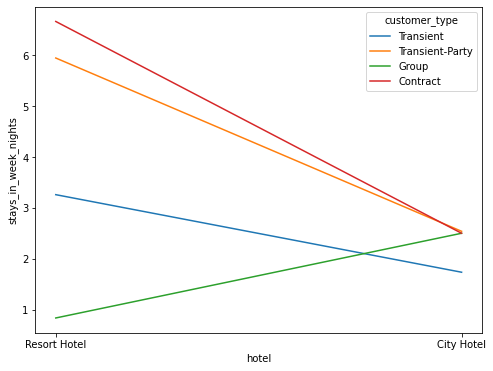

In [35]:
plt.figure(figsize = (8, 6))

sns.lineplot(x = 'hotel', y = 'stays_in_week_nights', hue = 'customer_type', ci = None,
             estimator = 'mean', data = df);

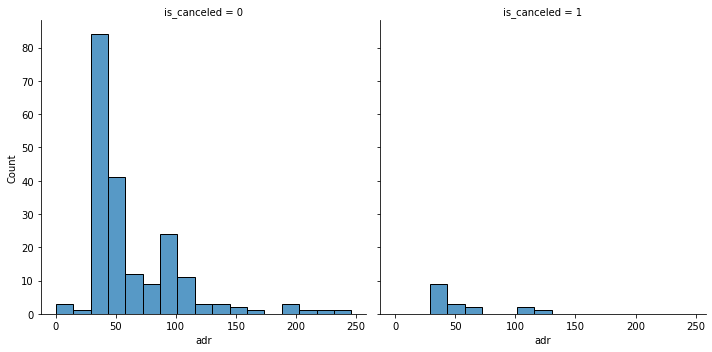

In [36]:
sns.displot(data = df, x = 'adr', col = 'is_canceled');

<AxesSubplot:xlabel='customer_type', ylabel='count'>

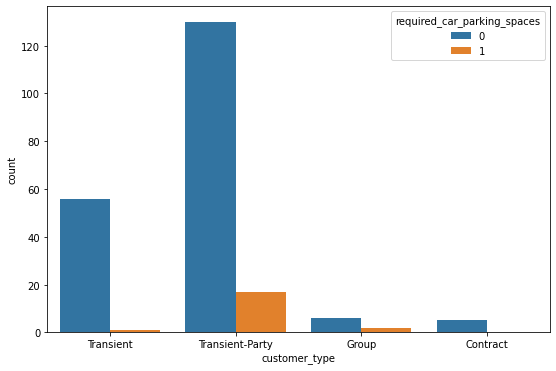

In [37]:
plt.figure(figsize = (9, 6))

sns.countplot(x = 'customer_type', hue = 'required_car_parking_spaces', data = df)

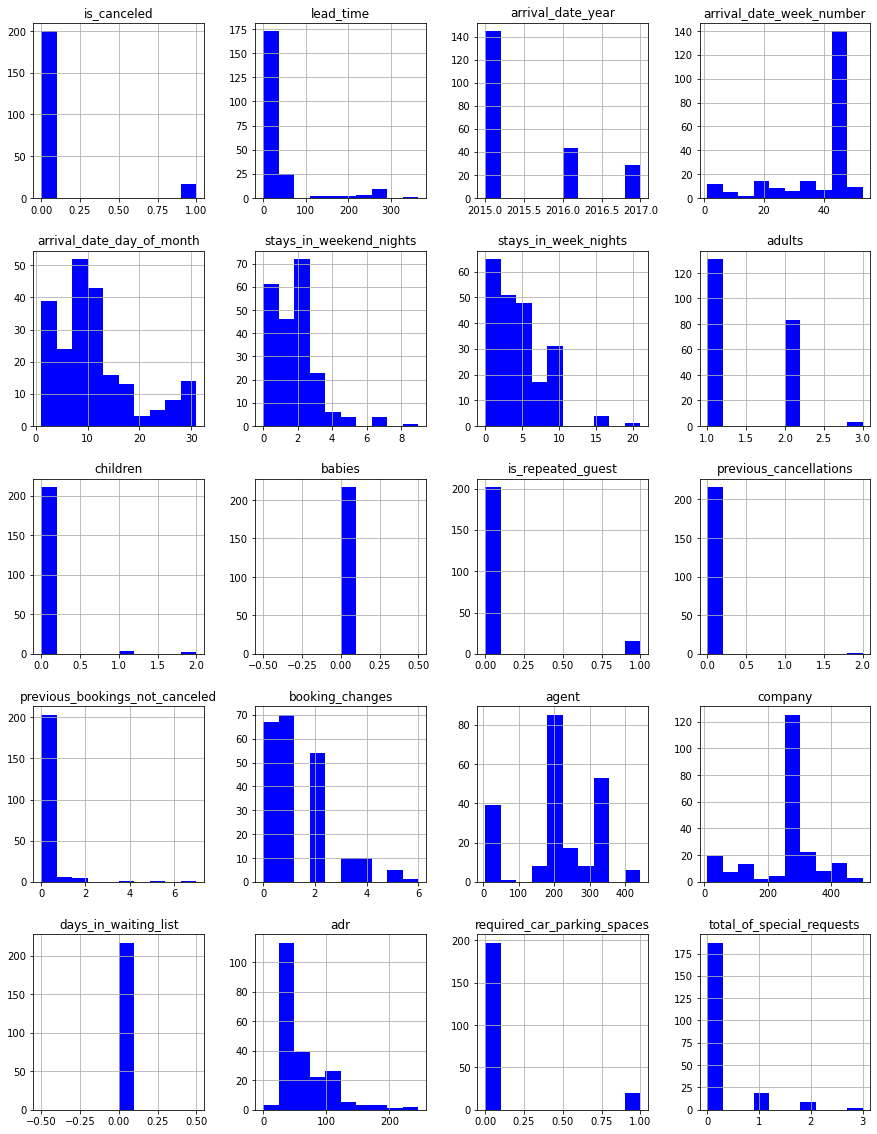

In [38]:
# plot histograms for each numerical variable
df.hist(figsize = (15, 20),color='b')
plt.show()